<a href="https://colab.research.google.com/github/kavyatejaswini24/EMIPredict-AI---Intelligent-Financial-Risk-Assessment-Platform/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

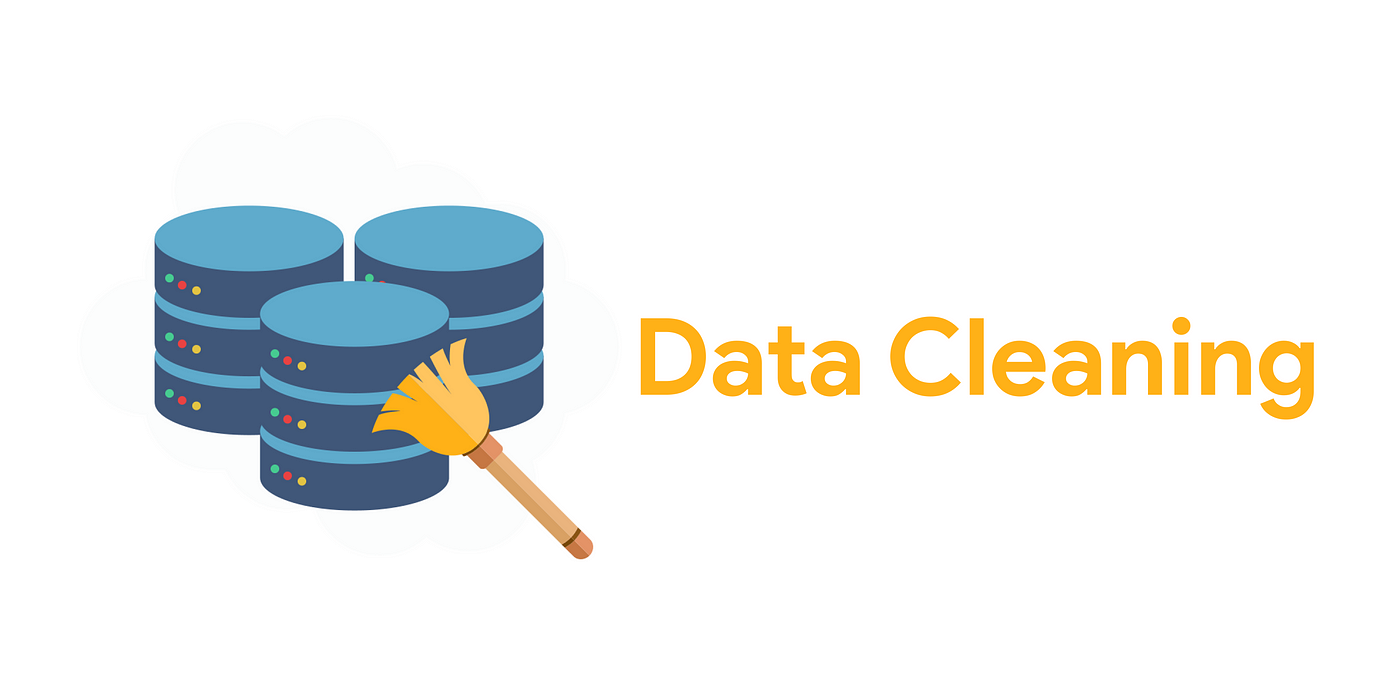

# **Loan Approval Classification Dataset**

## Dataset Description

|Column|	Description|	Type|
|------|-------------|------|
|person_age|	Age of the person|	Float|
|person_gender|	Gender of the person|	Categorical|
|person_education	|Highest education level|	Categorical|
|person_income|Annual income|	Float|
|person_emp_exp|	Years of employment experience|	Integer|
|person_home_ownership|	Home ownership status (e.g., rent, own, mortgage)|	Categorical|
|loan_amnt|	Loan amount requested|	Float|
|loan_intent|Purpose of the loan|	Categorical|
|loan_int_rate|	Loan interest rate|	Float|
|loan_percent_income|Loan amount as a percentage of annual income|	Float|
|cb_person_cred_hist_length|	Length of credit history in years|	Float|
|credit_score	|Credit score of the person|	Integer|
|previous_loan_defaults_on_file|	Indicator of previous loan defaults	|Categorical|
|loan_status (classification target)|	Loan approval status: 1 = approved; 0 = rejected|	Integer|

## Import data from kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'loan-approval-classification-data' dataset.
Path to dataset files: /kaggle/input/loan-approval-classification-data


# Check the name of the file saved

In [2]:
import os
import pandas as pd
print(os.listdir(path))


['loan_data.csv']


# Read the data using Pandas

In [3]:
data = pd.read_csv(os.path.join(path,'loan_data.csv'))
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


#  Understanding the Data

In [4]:
data.shape

(45000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
data.duplicated().sum()

np.int64(0)

# Unique & Categorical Insights

In [ ]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
for col in data.columns:
  print(f"{col}:\n Unique values:",data[col].nunique(),"\n", data[col].unique())
  print()
  print()

person_age:
 Unique values: 60 
 [ 22.  21.  25.  23.  24.  26. 144. 123.  20.  32.  34.  29.  33.  28.
  35.  31.  27.  30.  36.  40.  50.  45.  37.  39.  44.  43.  41.  46.
  38.  47.  42.  48.  49.  58.  65.  51.  53.  66.  61.  54.  57.  59.
  62.  60.  55.  52.  64.  70.  78.  69.  56.  73.  63.  94.  80.  84.
  76.  67. 116. 109.]


person_gender:
 Unique values: 2 
 ['female' 'male']


person_education:
 Unique values: 5 
 ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


person_income:
 Unique values: 33989 
 [71948. 12282. 12438. ... 31924. 56942. 33164.]


person_emp_exp:
 Unique values: 63 
 [  0   3   1   5   4   2   7   6 125   8 121 101 100  12  10   9  14  13
  11  15  16  17  19  28  25  18  24  22  20  23  21  31  26  27  29  32
  30 124  40  43  33  44  34  42  37  45  36  41  47  38  39  35  57  46
  49  48  50  76  62  61  58  93  85]


person_home_ownership:
 Unique values: 4 
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER']


loan_amnt:
 Unique values: 4483 
 [35000

In [ ]:
data[data['person_age']==144]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0


Some rows in the dataset contain unrealistic values, such as:

>* **Age values**(e.g., 144, 123, 116 years old) → Highly unlikely in a real-world dataset.

>* **Employment experience** (e.g., 125 years) → Impossible since it exceeds normal human lifespan.

>* **Income discrepancies** -  72 lakhs/ annum

In [ ]:
# Checking columns where age is more than 75

data[data['person_age'] > 75]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32355,78.0,male,Associate,58463.0,57,RENT,3000.0,MEDICAL,7.51,0.05,25.0,754,No,0
32416,94.0,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32422,80.0,male,High School,77894.0,62,RENT,6800.0,MEDICAL,11.71,0.09,25.0,673,No,0
32506,84.0,male,High School,114705.0,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
32534,76.0,female,Bachelor,90934.0,58,RENT,15000.0,MEDICAL,8.94,0.16,25.0,737,No,0


In [ ]:
# checking rows where experience is more than 55

data[data['person_emp_exp']> 55]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32355,78.0,male,Associate,58463.0,57,RENT,3000.0,MEDICAL,7.51,0.05,25.0,754,No,0
32416,94.0,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32422,80.0,male,High School,77894.0,62,RENT,6800.0,MEDICAL,11.71,0.09,25.0,673,No,0
32506,84.0,male,High School,114705.0,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
32534,76.0,female,Bachelor,90934.0,58,RENT,15000.0,MEDICAL,8.94,0.16,25.0,737,No,0


In [ ]:
# Checking the percentage of unrealistic data

(len(data[data['person_age'] > 75])/len(data))*100

0.02666666666666667

In [ ]:
data = data[(data['person_age'] <= 75) & (data['person_emp_exp']<=55)]
data.shape

(44988, 14)

In [ ]:
data = data.reset_index(drop=True)  # reset index after dropping rows

# Handling Outliers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

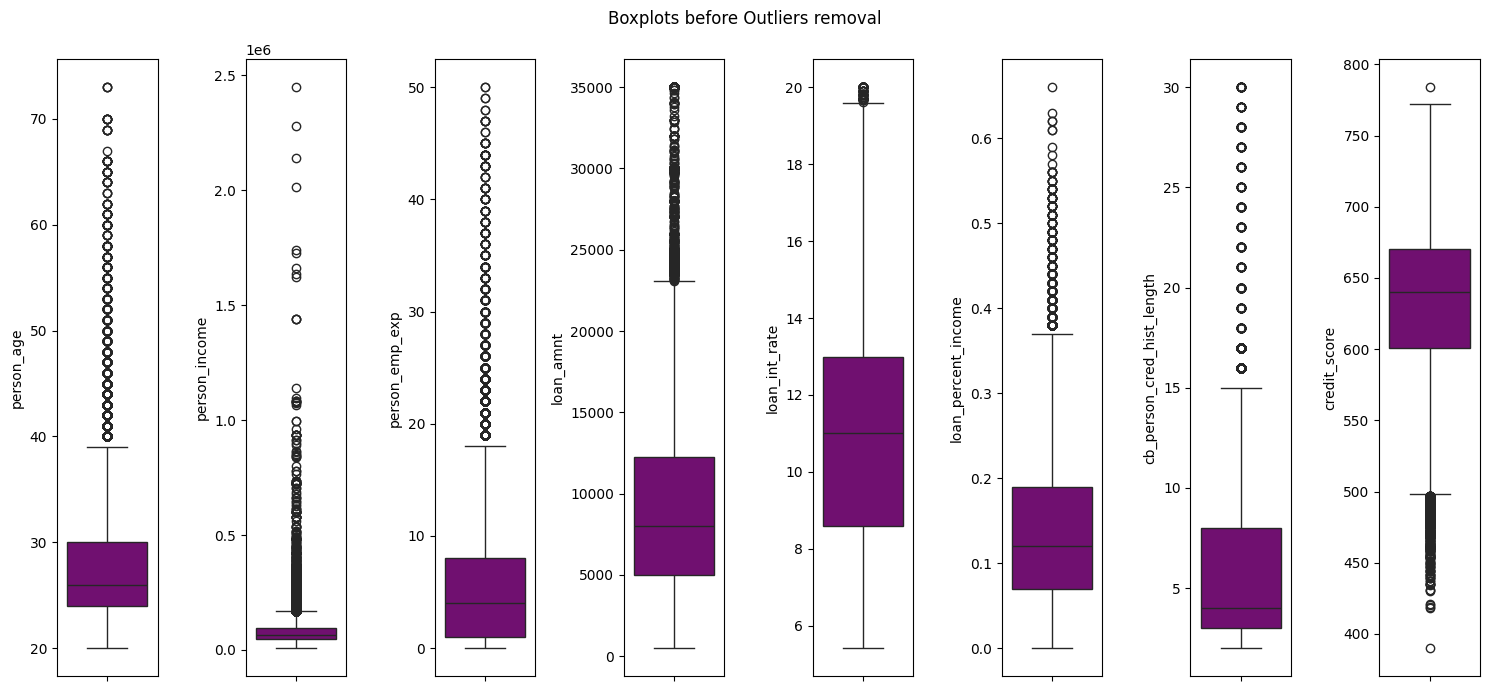

In [ ]:
numerical_cols = ['person_age','person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
                  'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Loop through numerical columns and create boxplots

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=data[numerical_cols[i]],color='purple')
    plt.tight_layout()

# IQR Method


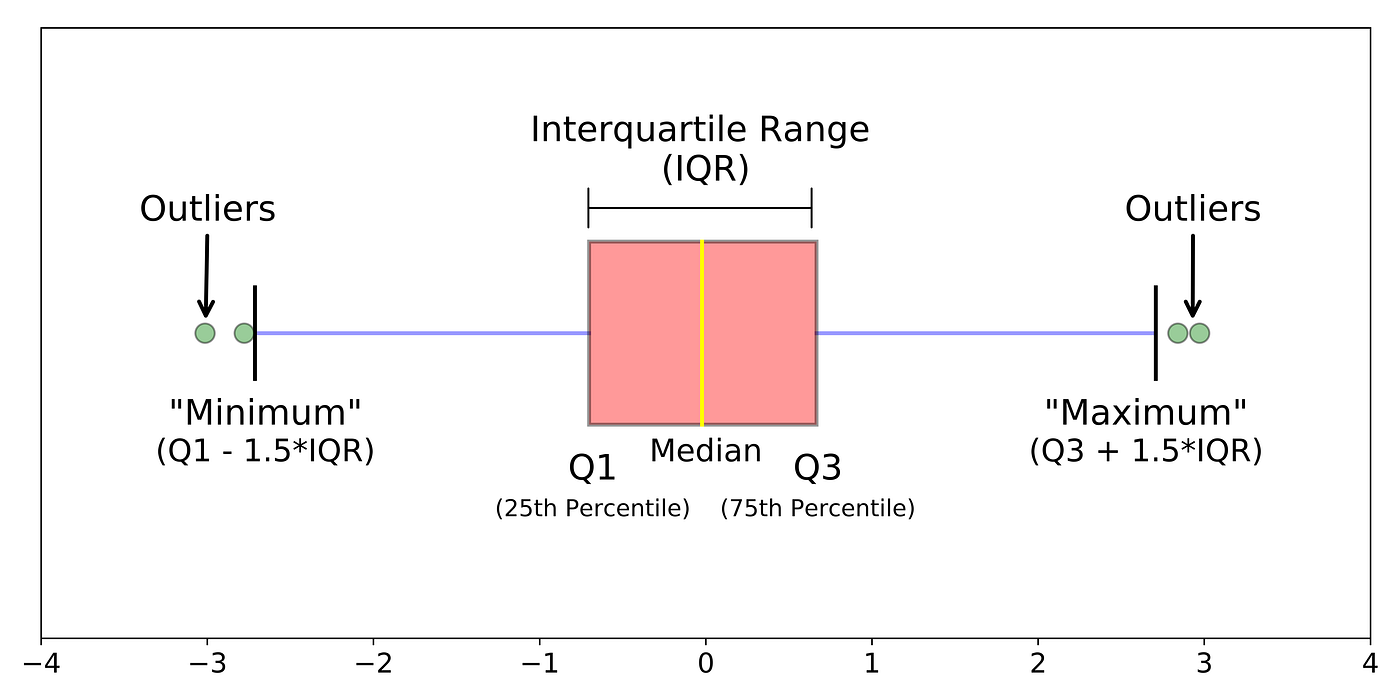

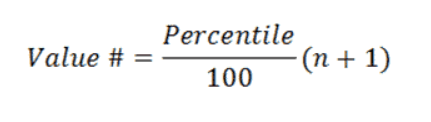



In [ ]:
data['person_age'].min()

20.0

In [ ]:
data['person_age'].median()

26.0

In [ ]:
len(data)

44988

In [ ]:
(25/100)*(44988+1)

11247.25

In [ ]:
data['person_age'].iloc[33742]

np.float64(23.0)

In [ ]:
data['person_age'].sort_values().reset_index().iloc[11247]

,11247
index,38588.0
person_age,24.0


In [ ]:
data['person_age'].sort_values().reset_index().iloc[33741]
q1 = 24.0
q3 = 30.0
iqr = 6

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
print(lower,upper)

15.0 39.0


In [ ]:
data['person_age'].quantile(0.25)

np.float64(24.0)

In [ ]:
import numpy as np

for col in numerical_cols:

    Q1 = data[col].quantile(0.25)  # 25th percentile
    Q3 = data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

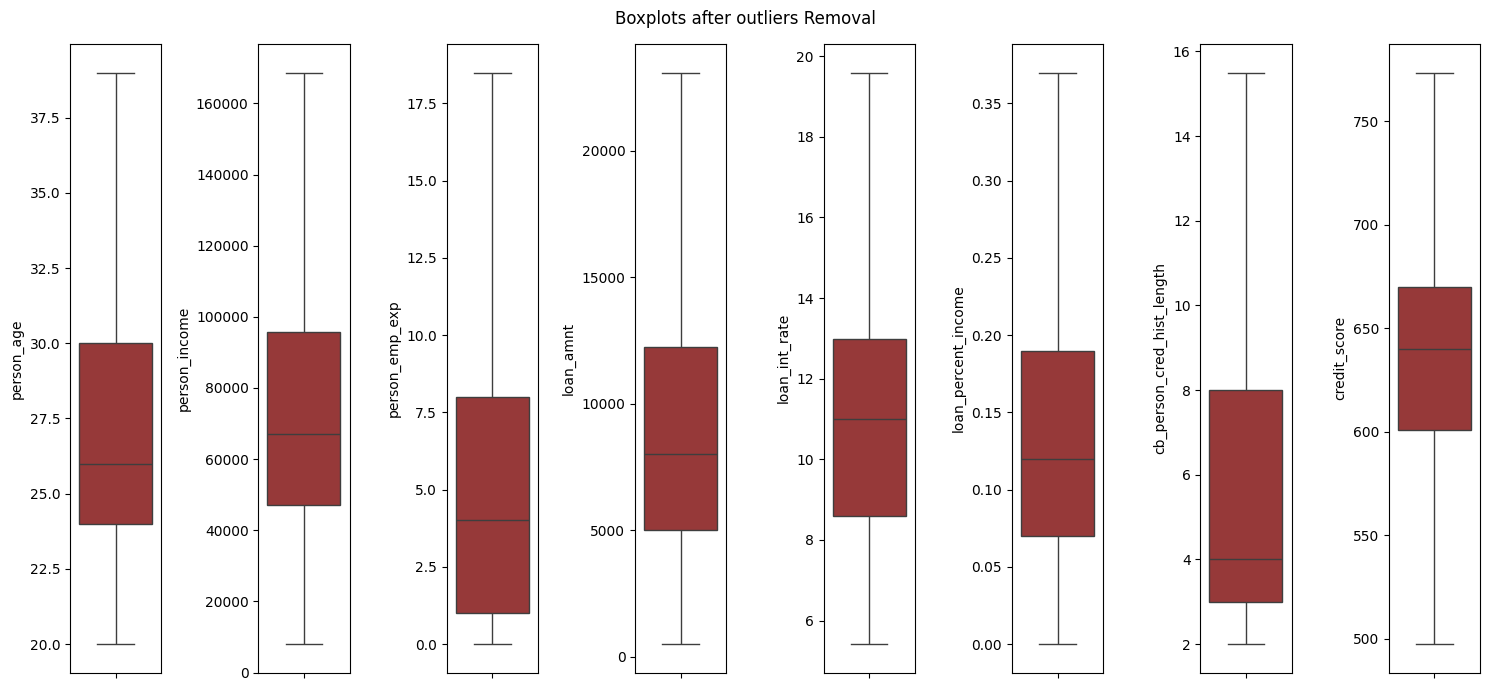

In [ ]:
numerical_cols = ['person_age','person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
                  'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Loop through numerical columns and create boxplots
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after outliers Removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=data[numerical_cols[i]],color='brown')
    plt.tight_layout()